In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\vtr_b\AppData\Local\Temp\ipykernel_7224\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
mapa_columns = {'mileage_per_year': 'milhas_por_ano'
         ,'model_year': 'ano_do_modelo'
         ,'price':'preco'
         ,'sold': 'vendido'}
mapa_dados = {'yes': 1,
              'no' : 0}

In [5]:
dados.rename(columns = mapa_columns, inplace = True)
dados.vendido = dados.vendido.map(mapa_dados)

In [6]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [7]:
from datetime import datetime
#ano_atual = datetime.today().year
ano_atual = 2018
dados['idade_do_modelo'] = 2018 - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,18
1,1,7843,1998,40557.96,1,20
2,2,7109,2006,89627.50,0,12
3,3,26823,2015,95276.14,0,3
4,4,7935,2014,117384.68,1,4


In [8]:
dados["km_por_ano"] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,18,35085.22134
1,1,7843,1998,40557.96,1,20,12622.05362
2,2,7109,2006,89627.50,0,12,11440.79806
3,3,26823,2015,95276.14,0,3,43167.32682
4,4,7935,2014,117384.68,1,4,12770.11290


In [9]:
dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], inplace = True)

In [10]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [11]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

# Treinando o modelo 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
np.random.seed(5)


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsao  = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsao)

print(f'A acurácia foi de {(acuracia*100):.2f}%')

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 58.00%


D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Fazendo e testando o baseline Manualmente

In [13]:
baseline = np.ones(len(teste_x))

In [14]:
acuracia_baseline = accuracy_score(teste_y, baseline)
print(f'A acurácia da previsão com a baseline foi de {(acuracia_baseline*100):.2f}%')

A acurácia da previsão com a baseline foi de 58.00%


# Fazendo e testando com dammy

## stratify

In [15]:
from sklearn.dummy import DummyClassifier
np.random.seed(5)
dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)
previsoes_score = dummy.score(teste_x, teste_y)
acuracia = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de {(acuracia*100):.2f}%')
previsoes_score

A acurácia foi de 51.24%


0.4984

## most frequence

In [16]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi de {(acuracia*100):.2f}%')

A acurácia foi de 58.00%


# Usando o SVC e StandardScaler

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

np.random.seed(5)

raw_X_train, raw_X_test, raw_y_train, raw_y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

print(f'treino {len(raw_X_train)} e teste {len(raw_X_test)}')

scaler = StandardScaler()
scaler.fit(raw_X_train)
xtrain = scaler.transform(raw_X_train)
xtest = scaler.transform(raw_X_test)

modelo = SVC()
modelo.fit(xtrain, raw_y_train)
y_previsto = modelo.predict(xtest)
acuracia = accuracy_score(raw_y_test, y_previsto)
print(f'acurácia de {(acuracia*100):.2f}%')

treino 7500 e teste 2500
acurácia de 77.48%


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


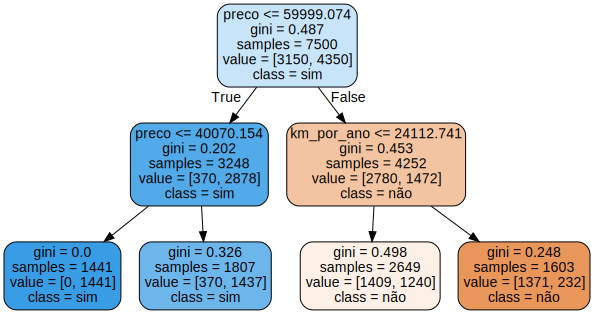

In [19]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico
